<a href="https://colab.research.google.com/github/SaiRam-43/Python_list/blob/main/EDA_Text_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df=pd.read_csv("tripadvisor_hotel_reviews.csv")
df.head()


,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
df['Rating'].value_counts()

,count
Rating,
5,9054
4,6039
3,2184
2,1793
1,1421


In [ ]:
def ratings(rating):
  """
  This function categorizes ratings based on their values.
  """
  if rating >= 4:
    return 'Good'
  elif rating >=2:
    return 'Average'
  else:
    return 'Bad'

In [ ]:
df['Rating']=df['Rating'].apply(ratings)

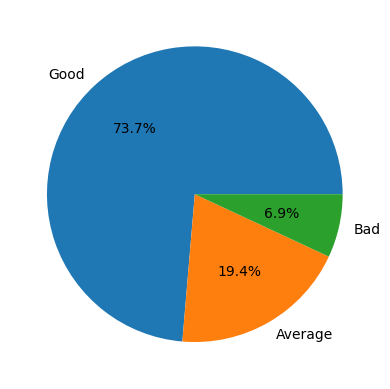

In [ ]:
plt.pie(df['Rating'].value_counts(),
       labels=df['Rating'].unique().tolist(),
       autopct='%1.1f%%')
plt.show()

In [ ]:
length = len(df['Review'][0])
print(f'Length of a sample review: {length}')

Length of a sample review: 593


In [ ]:
df['mean_word_length'] = df['Review'].apply(lambda x: np.mean([len(word) for word in str(x).split()]))
df.head()

,Review,Rating,mean_word_length
0,nice hotel expensive parking got good deal sta...,Good,5.804598
1,ok nothing special charge diamond member hilto...,Average,5.752000
2,nice rooms not 4* experience hotel monaco seat...,Average,5.571429
3,"unique, great stay, wonderful time hotel monac...",Good,5.730337
4,"great stay great stay, went seahawk game aweso...",Good,5.701571


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
from nltk.corpus import stopwords

def clean(review):
  # Convert list of words back to a single string
  review = " ".join(review)
  review = review.lower()
  review = re.sub('[^a-z A-Z 0-9-]+', '', review)
  review = " ".join([word for word in review.split() if word not in stopwords.words('english')])
  return review

df['Review'] = df['Review'].apply(clean)
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms 4 experience hotel monaco seattle g...,3
3,unique great stay wonderful time hotel monaco ...,5
4,great stay great stay went seahawk game awesom...,5


In [ ]:
df['Review'][0]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

In [ ]:
def corpus(text):
  text_list=text.split()
  return text_list

In [ ]:
df['Review']=df['Review'].apply(corpus)
df.head()

,Review,Rating
0,"[nice, hotel, expensive, parking, got, good, d...",4
1,"[ok, nothing, special, charge, diamond, member...",2
2,"[nice, rooms, not, 4*, experience, hotel, mona...",3
3,"[unique,, great, stay,, wonderful, time, hotel...",5
4,"[great, stay, great, stay,, went, seahawk, gam...",5


In [ ]:
!pip install tqdm

In [ ]:
from tqdm import trange
corpus=[]
for i in trange(df.shape[0],ncols=150,nrows=10,colour='green',smoothing=0.8):
  corpus+=df['Review'][i]
len(corpus)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 20491/20491 [00:00<00:00, 52589.14it/s]


14144644

In [ ]:
from collections import Counter
mostcommon=Counter(corpus).most_common(10)
mostcommon

[(' ', 2040431),
 ('e', 1510954),
 ('a', 969682),
 ('t', 951581),
 ('o', 896090),
 ('r', 844387),
 ('i', 801025),
 ('s', 772094),
 ('n', 753244),
 ('l', 693340)]

In [ ]:
words=[]
freq=[]
for word,count in mostcommon:
  words.append(word)
  freq.append(count)

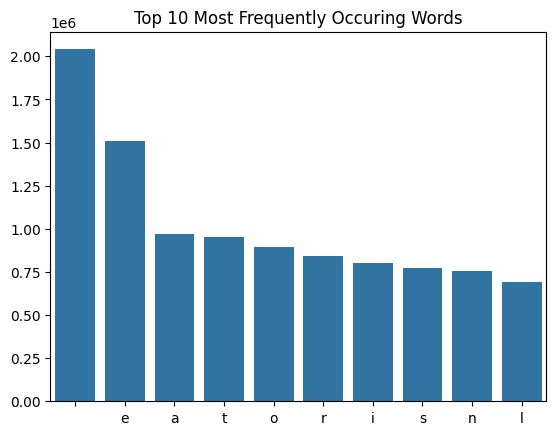

In [ ]:
import seaborn as sns
sns.barplot(x=words,y=freq)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(2,2))
X=cv.fit_transform(df['Review'])

In [ ]:
count_values = X.toarray().sum(axis=0) # Change bigrams to X
ngram_freq = pd.DataFrame(sorted([(count_values[i],k) for k,i in cv.vocabulary_.items()],reverse=True))
ngram_freq.columns = ['frequency','bigram']

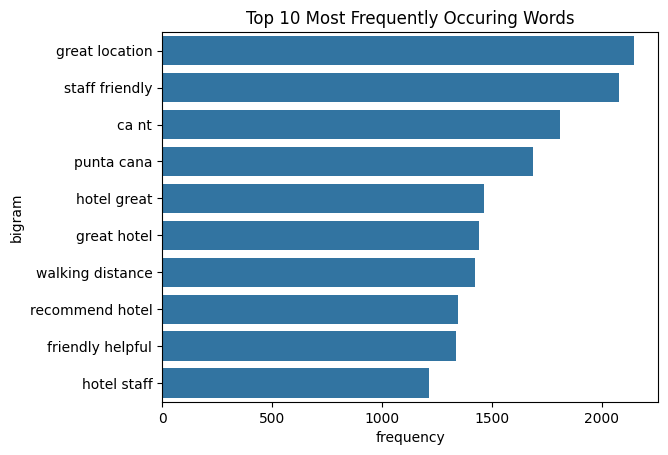

In [ ]:
import seaborn as sns
sns.barplot(x=ngram_freq['frequency'][:10],y=ngram_freq['bigram'][:10]) # Changed 'ngram' to 'bigram'
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()